#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
!pip install numpy pandas scikit-learn wandb matplotlib

In [2]:
import wandb
wandb.login(key="6deef52b9cafa9295b9fd3039cdaed3b45234c52")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ramam11 (ramam11-plaksha-university). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
run = wandb.init(project='distance_classification', name="face_clustering")

wandb: Tracking run with wandb version 0.19.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250226_102238-s3n0wgli
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run face_clustering
wandb: ⭐️ View project at https://wandb.ai/ramam11-plaksha-university/distance_classification
wandb: 🚀 View run at https://wandb.ai/ramam11-plaksha-university/distance_classification/runs/s3n0wgli


In [5]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('/kaggle/input/mlprlab/Plaksha_Faculty.jpg')
  
## Convert the image to grayscale

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, minNeighbors=4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 0  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)


wandb.log({"Input image 1": wandb.Image('/kaggle/input/mlprlab/Plaksha_Faculty.jpg')})
    
## Display the image and window title should be "Total number of face detected are #"  
# cv2.imshow(f"Total number of faces detected are {len(faces_rect)}", img)
# cv2.waitKey(0)

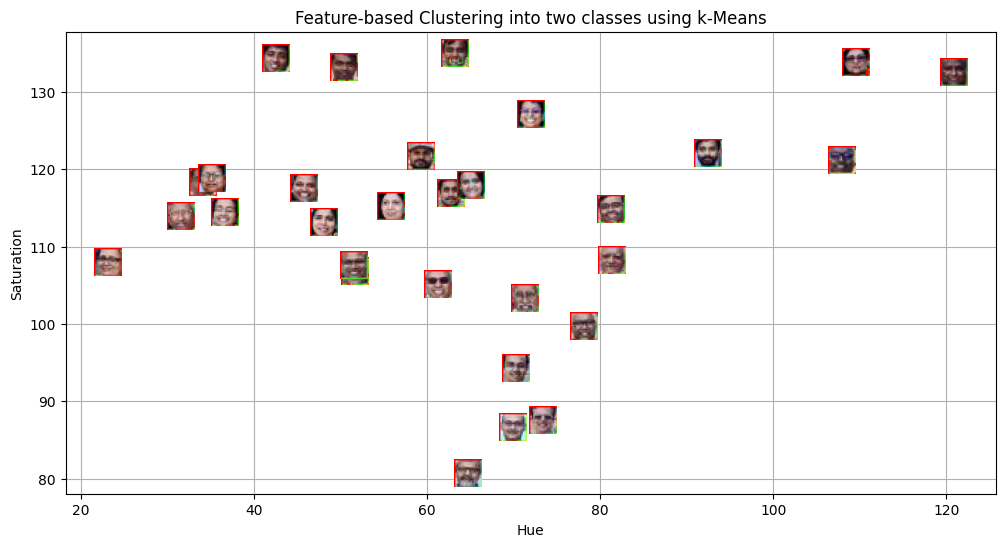

In [6]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, n_init=10).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Feature-based Clustering into two classes using k-Means')
## Put grid
plt.grid(True)

plt.savefig("cluster_faces_initial.png")

## show the plot
plt.show()

wandb.log({"Cluster Scatter Plotting": wandb.Image('/kaggle/working/cluster_faces_initial.png')})

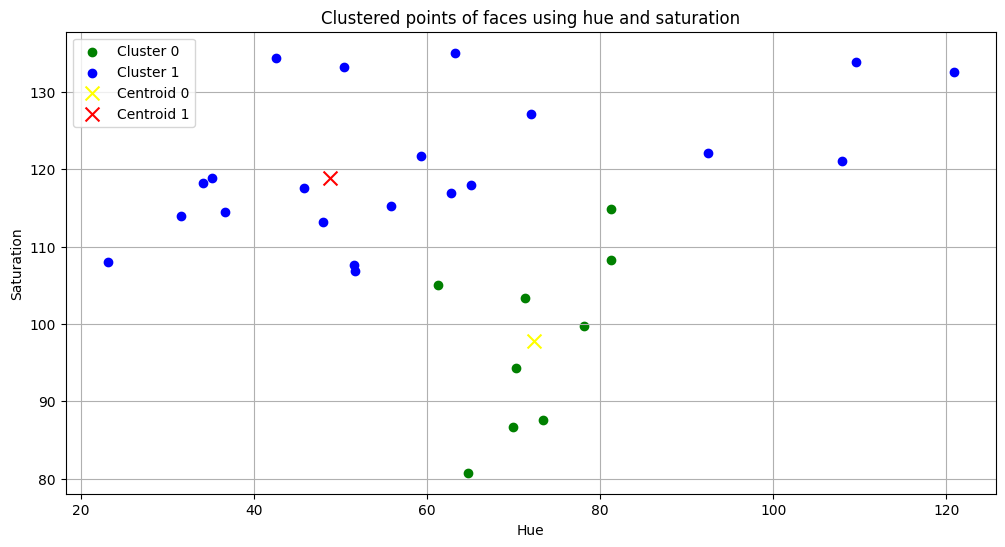

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='yellow', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='red', marker='x', s=100, label='Centroid 1')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Clustered points of faces using hue and saturation')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)

plt.savefig("cluster_points.png")

## Show the plot
plt.show

wandb.log({"Cluster Scatter Plotting Points": wandb.Image('/kaggle/working/cluster_points.png')})

In [8]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('/kaggle/input/mlprlab/Dr_Shashi_Tharoor.jpg')

# Detect face  in the template image after converting it to gray and store it in template_faces
gray_template_img = cv2.cvtColor(template_img,cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(gray_template_img, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25), maxSize=(50, 50))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

wandb.log({"Input image 2": wandb.Image('/kaggle/input/mlprlab/Dr_Shashi_Tharoor.jpg')})
# cv2.imshow('Detected face in template image', template_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()      

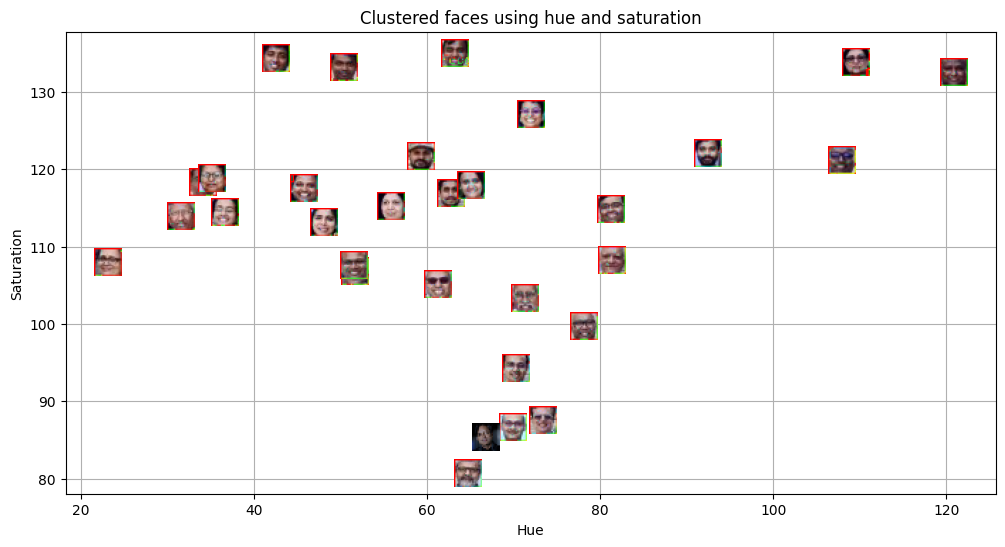

In [9]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img,cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
color = 'red' if template_label == 0 else 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Clustered faces using hue and saturation')
## Add grid
plt.grid(True)

plt.savefig("cluster_faces.png")

## show plot
plt.show()

wandb.log({"Cluster Scatter Plotting Faces": wandb.Image('/kaggle/working/cluster_faces.png')})

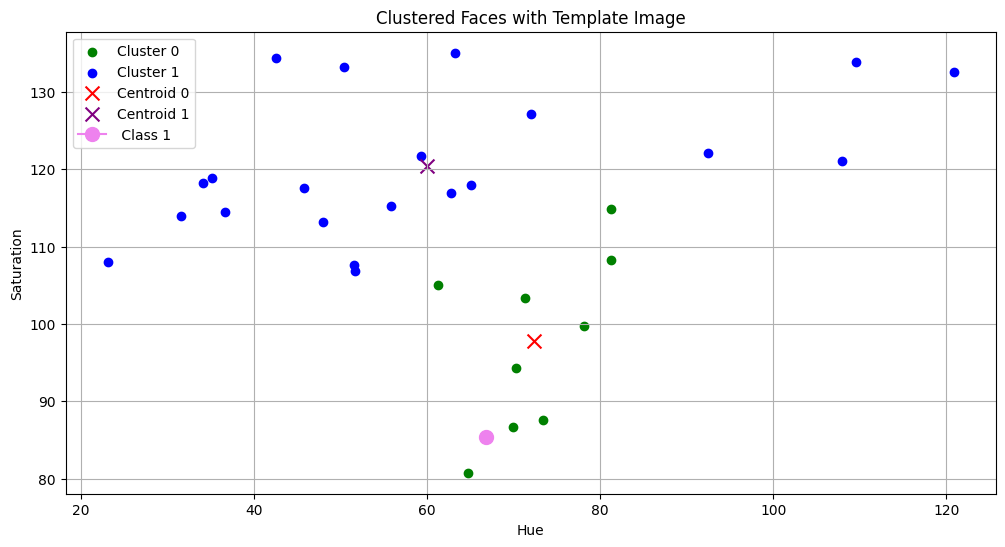

wandb:                                                                                
wandb: 🚀 View run face_clustering at: https://wandb.ai/ramam11-plaksha-university/distance_classification/runs/s3n0wgli
wandb: ⭐️ View project at: https://wandb.ai/ramam11-plaksha-university/distance_classification
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 6 other file(s)
wandb: Find logs at: ./wandb/run-20250226_102238-s3n0wgli/logs


In [10]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=100, label='Centroid 0')  ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color='purple', marker='x', s=100, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class 1' )

## Put x label
plt.xlabel('Hue')

## Put y label
plt.ylabel('Saturation')

## Put title
plt.title('Clustered Faces with Template Image')

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## Show the plot
plt.savefig("updated_cluster.png")
plt.show()

wandb.log({"Cluster Scatter Plot after the addition of template image": wandb.Image('/kaggle/working/updated_cluster.png')})

wandb.finish()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

Ans. Some of the common distance metrics used in distance based classification algorithms are Euclidean distance, Minkowski distance, Mahalanobis distance, Manhattan distance, Cosine distance, Chebyshev distance and Hamming distance.

#### 2. What are some real-world applications of distance-based classification algorithms? 

Ans. Real-world applications of distance based classification algorithms are image recognition based on similarity, recommendation systems based on used preference, medical diagnosis in classifying diseases based on symptomps and past occurence, text classification in categorizing emails or documents based on content similarity, fraud detection in identifying fraudulent transactions, geospatial analysis in classifying regions based on geographical features or proximity.

#### 3. Explain various distance metrics. 

Ans. Various distance metrics are as follows:
i) Euclidean Distance- Represents the shortest distance between two vectors.
ii) Manhattan Distance- Represents the distance between two points measured along axes at right angles.
iii) Minkowski Distance- A generalized distance metric that includes Euclidean and Manhattan distances as special cases.
iv) Cosine Distance- Measures the cosine of the angle between two vectors.
v) Hamming Distance- Measures the minimum number of substitutions required to change one string (or bit) into the other.
vi) Chebyshev Distance- Measures the maximum absolute difference between coordinates.
vii) Mahalanobis Distance- Represents the distance between a point P and a distribution D by measuring how many standard deviations away P is from the mean of D.

#### 4. What is the role of cross validation in model performance? 

Ans. Cross validation is a technique used to evaluate the peformance of an ML model. It helps in preventing model overfitting and selecting the best hyperparameters for fine tuning of the model. One of the common type of cross validation is k-Fold Cross-Validation where the dataset is split into k subsets, and the model is trained and tested k times, each time using a different subset as the test set.

#### 5. Explain variance and bias in terms of KNN? 

Ans. Bias refers to the error introduced by approximating a real-world problem with a simplified model. A high bias occurs when 
k is too large. The model becomes too simplistic and may underfit the data, failing to capture the underlying patterns.
Variance refers to the model's sensitivity to small fluctuations in the training data.  A high variance occurs when 
k is too small. The model becomes overly complex and may overfit the data, capturing noise instead of the underlying patterns.
Low k indicates high variance and low bias where the model is highly sensitive to noise and may overfit.
High k indicates high bias and low variance where the model becomes too simplistic and may underfit.
Therefore, a balance between bias and variance is achieved by selecting an appropriate optimal value of k through methods like cross validation.